In [ ]:
import pandas as pd
import requests
import numpy as np
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
from google.colab import files
import seaborn as sns

# Listagem dos deputados em exercício em 2023 que informaram Twitter
## Via serviço de Dados Abertos da Câmara dos Deputados
O serviço pode ser acessado através do link https://dadosabertos.camara.leg.br/swagger/api.html 

O objetivo é coletar informações sobre o gênero, estado e o Twitter informado dos deputados em exercício a partir de 01/01/2023.

In [ ]:
resp = requests.get('https://dadosabertos.camara.leg.br/api/v2/deputados?dataInicio=2023-01-01&ordem=ASC&ordenarPor=nome',headers={'content-type':'application/json'})
print(resp.json())

{'dados': [{'id': 220593, 'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/220593', 'nome': 'Abilio Brunini', 'siglaPartido': 'PL', 'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37906', 'siglaUf': 'MT', 'idLegislatura': 57, 'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/220593.jpg', 'email': 'dep.abiliobrunini@camara.leg.br'}, {'id': 204379, 'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/204379', 'nome': 'Acácio Favacho', 'siglaPartido': 'MDB', 'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/36899', 'siglaUf': 'AP', 'idLegislatura': 57, 'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/204379.jpg', 'email': 'dep.acaciofavacho@camara.leg.br'}, {'id': 220714, 'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/220714', 'nome': 'Adail Filho', 'siglaPartido': 'REPUBLICANOS', 'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37908', 'siglaUf': 'AM', 'idLegislatura': 57, 'urlFot

In [ ]:
df_dados_gerais = pd.json_normalize(resp.json()['dados'])
print(df_dados_gerais.shape)
df_dados_gerais.head()

(548, 9)


,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br


In [ ]:
ids = df_dados_gerais['id'].values
dados_especificos = []
for id in ids:
  req = requests.get('https://dadosabertos.camara.leg.br/api/v2/deputados/'+str(id),headers={'content-type':'application/json'})
  dados_especificos.append(req.json()['dados'])

In [ ]:
df_dados_especificos = pd.json_normalize(dados_especificos)
print(df_dados_especificos.shape)
df_dados_especificos.head()

(548, 32)


,id,uri,nomeCivil,cpf,sexo,urlWebsite,redeSocial,dataNascimento,dataFalecimento,ufNascimento,...,ultimoStatus.nomeEleitoral,ultimoStatus.gabinete.nome,ultimoStatus.gabinete.predio,ultimoStatus.gabinete.sala,ultimoStatus.gabinete.andar,ultimoStatus.gabinete.telefone,ultimoStatus.gabinete.email,ultimoStatus.situacao,ultimoStatus.condicaoEleitoral,ultimoStatus.descricaoStatus
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,ABILIO JACQUES BRUNINI MOUMER,99770962104,M,None,[],1984-01-31,None,MT,...,Abilio Brunini,648,4,648,6,3215-5648,dep.abiliobrunini@camara.leg.br,Exercício,Titular,None
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,ACÁCIO DA SILVA FAVACHO NETO,74287028287,M,None,"[https://twitter.com/acaciofavacho, https://ww...",1983-09-28,None,AP,...,Acácio Favacho,414,4,414,4,3215-5414,dep.acaciofavacho@camara.leg.br,Exercício,Titular,None
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,ADAIL JOSÉ FIGUEIREDO PINHEIRO,77267796249,M,None,[https://twitter.com/adailfilhoam?s=21&t=O_eoT...,1992-02-16,None,AM,...,Adail Filho,531,4,531,5,3215-5531,dep.adailfilho@camara.leg.br,Exercício,Titular,None
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,ADILSON BARROSO OLIVEIRA,05585378805,M,None,[],1964-06-14,None,MG,...,Adilson Barroso,750,4,750,7,3215-5750,dep.adilsonbarroso@camara.leg.br,Exercício,Suplente,None
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,ADOLFO VIANA DE CASTRO NETO,80123848504,M,None,[],1981-02-02,None,BA,...,Adolfo Viana,911,4,911,9,3215-5911,dep.adolfoviana@camara.leg.br,Exercício,Titular,None


In [ ]:
#df_dados_especificos.loc[(df_dados_especificos['ultimoStatus.situacao'] != 'Exercício')]

In [ ]:
df_deputados_camara = df_dados_especificos[['id','nomeCivil','cpf','sexo','redeSocial','ultimoStatus.siglaUf']].loc[(df_dados_especificos['ultimoStatus.situacao'] == 'Exercício')]
print(df_deputados_camara.shape)
df_deputados_camara.head(10)

(513, 6)


,id,nomeCivil,cpf,sexo,redeSocial,ultimoStatus.siglaUf
0,220593,ABILIO JACQUES BRUNINI MOUMER,99770962104,M,[],MT
1,204379,ACÁCIO DA SILVA FAVACHO NETO,74287028287,M,"[https://twitter.com/acaciofavacho, https://ww...",AP
2,220714,ADAIL JOSÉ FIGUEIREDO PINHEIRO,77267796249,M,[https://twitter.com/adailfilhoam?s=21&t=O_eoT...,AM
3,221328,ADILSON BARROSO OLIVEIRA,05585378805,M,[],SP
4,204560,ADOLFO VIANA DE CASTRO NETO,80123848504,M,[],BA
5,204528,ADRIANA MIGUEL VENTURA,12519851813,F,"[https://twitter.com/adriventurasp, https://ww...",SP
6,121948,ADRIANO ANTÔNIO AVELAR,50746553153,M,[],GO
7,74646,AÉCIO NEVES DA CUNHA,66728983791,M,[],MG
9,136811,JOSÉ ALFONSO EBERT HAMM,37040642034,M,"[https://www.facebook.com/depafonsohamm, https...",RS
10,178835,AFONSO ANTUNES DA MOTTA,10777296004,M,[],RS


In [ ]:
#Filtrando deputados que não informaram nenhuma rede social
df_deputados_camara = df_deputados_camara[df_deputados_camara['redeSocial'].str.len() > 0]

In [ ]:
redes_sociais = df_deputados_camara['redeSocial'].values
twitters = []
for t in redes_sociais:
  if 'twitter' in t[0]:
    twitters.append(t[0])
print(twitters)

['https://twitter.com/acaciofavacho', 'https://twitter.com/adailfilhoam?s=21&t=O_eoTX0q1QfS6vmySI7biQ', 'https://twitter.com/adriventurasp', 'https://twitter.com/depaguinaldo11', 'http://twitter.com/alceu_moreira', 'https://twitter.com/AlencarBraga13', 'https://twitter.com/AlexManente23', 'https://twitter.com/lexandreleite', 'https://twitter.com/Alfredogaspar_', 'https://twitter.com/altineu', 'https://twitter.com/aluisiomendesma', 'https://twitter.com/amaliabarros', 'https://twitter.com/amaronetotv', 'https://twitter.com/eusouamom', 'https://twitter.com/apjunqueira', 'https://twitter.com/andrefernm', 'https://twitter.com/AndreJanonesAdv', 'https://twitter.com/antonioandradet', 'https://twitter.com/achinaglia', 'https://twitter.com/arnaldojardim', 'https://twitter.com/atilaliraof', 'https://twitter.com/dep_acoutinho', 'https://twitter.com/AUGUSTOPUPIO', 'https://twitter.com/AureoRibeiroRJ', 'https://twitter.com/mello_bandeira', 'https://twitter.com/benesleocadiorn', 'https://twitter.com

In [ ]:
#Filtrando deputados que possuem Twitter
df_deputados_camara = df_deputados_camara[df_deputados_camara['redeSocial'].str[0].isin(twitters)]
df_deputados_camara['twitter'] = df_deputados_camara['redeSocial'].copy().str[0]

In [ ]:
df_deputados_camara = df_deputados_camara[['id','nomeCivil','cpf','twitter','sexo','ultimoStatus.siglaUf']]
df_deputados_camara

,id,nomeCivil,cpf,twitter,sexo,ultimoStatus.siglaUf
1,204379,ACÁCIO DA SILVA FAVACHO NETO,74287028287,https://twitter.com/acaciofavacho,M,AP
2,220714,ADAIL JOSÉ FIGUEIREDO PINHEIRO,77267796249,https://twitter.com/adailfilhoam?s=21&t=O_eoTX...,M,AM
5,204528,ADRIANA MIGUEL VENTURA,12519851813,https://twitter.com/adriventurasp,F,SP
11,160527,AGUINALDO VELLOSO BORGES RIBEIRO,51921146400,https://twitter.com/depaguinaldo11,M,PB
17,160559,ALCEU MOREIRA DA SILVA,17968496004,http://twitter.com/alceu_moreira,M,RS
...,...,...,...,...,...,...
527,74283,VICENTE PAULO DA SILVA,12995398404,https://twitter.com/Vicentinhopt,M,SP
529,141555,VINICIUS RAPOZO DE CARVALHO,82286019720,https://twitter.com/falecomvinicius,M,SP
540,220660,YURY BRUNO ALENCAR ARAUJO,02364444330,https://twitter.com/yurydoparedao,M,CE
543,160632,JOSÉ SILVA SOARES,43422780653,https://twitter.com/ZeSilva_?t=FMvtU0UvtQUawDX...,M,MG


In [ ]:
df_deputados_camara.rename({'nomeCivil': 'nome', 'ultimoStatus.siglaUf': 'estado'}, axis=1, inplace=True)

In [ ]:
df_deputados_camara.head(10)

,id,nome,cpf,twitter,sexo,estado
1,204379,ACÁCIO DA SILVA FAVACHO NETO,74287028287,https://twitter.com/acaciofavacho,M,AP
2,220714,ADAIL JOSÉ FIGUEIREDO PINHEIRO,77267796249,https://twitter.com/adailfilhoam?s=21&t=O_eoTX...,M,AM
5,204528,ADRIANA MIGUEL VENTURA,12519851813,https://twitter.com/adriventurasp,F,SP
11,160527,AGUINALDO VELLOSO BORGES RIBEIRO,51921146400,https://twitter.com/depaguinaldo11,M,PB
17,160559,ALCEU MOREIRA DA SILVA,17968496004,http://twitter.com/alceu_moreira,M,RS
18,204501,ALENCAR SANTANA BRAGA,05544839808,https://twitter.com/AlencarBraga13,M,SP
19,178972,ALEX SPINELLI MANENTE,26838194805,https://twitter.com/AlexManente23,M,SP
22,160545,ALEXANDRE LEITE DA SILVA,22970812860,https://twitter.com/lexandreleite,M,SP
26,220576,ALFREDO GASPAR DE MENDONÇA NETO,72503017487,https://twitter.com/Alfredogaspar_,M,AL
29,178937,ALTINEU CÔRTES FREITAS COUTINHO,00007487738,https://twitter.com/altineu,M,RJ


# Listagem da candidatura dos deputados
## Via Portal de Dados Abertos do TSE
O serviço pode ser acessado através do link https://dadosabertos.tse.jus.br/dataset/candidatos-2022

O objetivo é ver se as informações já coletadas sobre o gênero e estado batem com as informadas durante a candidatura, além de coletar também a raça ou cor declaradas.

In [ ]:
resp = urlopen("https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2022.zip")
myzip = ZipFile(BytesIO(resp.read()))
print(myzip.namelist())

['consulta_cand_2022_AC.csv', 'consulta_cand_2022_AL.csv', 'consulta_cand_2022_AM.csv', 'consulta_cand_2022_AP.csv', 'consulta_cand_2022_BA.csv', 'consulta_cand_2022_BR.csv', 'consulta_cand_2022_CE.csv', 'consulta_cand_2022_DF.csv', 'consulta_cand_2022_ES.csv', 'consulta_cand_2022_GO.csv', 'consulta_cand_2022_MA.csv', 'consulta_cand_2022_MG.csv', 'consulta_cand_2022_MS.csv', 'consulta_cand_2022_MT.csv', 'consulta_cand_2022_PA.csv', 'consulta_cand_2022_PB.csv', 'consulta_cand_2022_PE.csv', 'consulta_cand_2022_PI.csv', 'consulta_cand_2022_PR.csv', 'consulta_cand_2022_RJ.csv', 'consulta_cand_2022_RN.csv', 'consulta_cand_2022_RO.csv', 'consulta_cand_2022_RR.csv', 'consulta_cand_2022_RS.csv', 'consulta_cand_2022_SC.csv', 'consulta_cand_2022_SE.csv', 'consulta_cand_2022_SP.csv', 'consulta_cand_2022_TO.csv', 'consulta_cand_2022_BRASIL.csv', 'leiame.pdf']


In [ ]:
df_candidatura_2022 = pd.read_csv(myzip.open('consulta_cand_2022_BRASIL.csv'), encoding='latin-1',sep=';')
df_candidatura_2022.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS
0,03/06/2023,19:49:06,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6021904620226130000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
1,03/06/2023,19:49:06,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6010896620226060000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
2,03/06/2023,19:49:06,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6006871720226120000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
3,03/06/2023,19:49:06,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6005576420226250000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
4,03/06/2023,19:49:06,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6024965220226260000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S


Os CPFs coletados da câmara estão como string de 11 dígitos, enquanto os CPFs do TSE são números inteiros.

```
011111111111 != 1111111111
```

Para poder fazer um join das duas bases através deles, iremos unificar essa formatação.

In [ ]:
cpfs = df_deputados_camara['cpf'].values
#Convertendo os valores de string para int, para ajudar no join
cpfs = [int(x) for x in cpfs]
cpfs = [str(x) for x in cpfs]

#Filtrando apenas a candidatura dos deputados da câmara
df_candidatura_deputados_2022 = df_candidatura_2022[df_candidatura_2022['NR_CPF_CANDIDATO'].apply(str).isin(cpfs)]
df_candidatura_deputados_2022.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS
64,03/06/2023,19:49:06,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6020617820226260000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
257,03/06/2023,19:49:06,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6016457320226130000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
378,03/06/2023,19:49:06,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6007382820226120000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
602,03/06/2023,19:49:06,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6008735620226150000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
1264,03/06/2023,19:49:06,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6012857320226190000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S


In [ ]:
df_candidatura_deputados_2022 = df_candidatura_deputados_2022[['NR_CPF_CANDIDATO','DS_COR_RACA','DS_GENERO','SG_UF']]

In [ ]:
def formata_cpf(row):
  string = str(row.loc['NR_CPF_CANDIDATO'])
  tamanho = len(string)
  if tamanho < 11:
    string = string.zfill(11)
  return string
df_candidatura_deputados_2022['cpf'] = df_candidatura_deputados_2022.apply(formata_cpf, axis=1)
df_candidatura_deputados_2022.head()

,NR_CPF_CANDIDATO,DS_COR_RACA,DS_GENERO,SG_UF,cpf
64,39154732867,BRANCA,FEMININO,SP,39154732867
257,84470666653,BRANCA,MASCULINO,MG,84470666653
378,5134552134,BRANCA,MASCULINO,MS,05134552134
602,3183427400,BRANCA,MASCULINO,PB,03183427400
1264,75061600720,PARDA,MASCULINO,RJ,75061600720


# Join dos dados da Câmara com os dados do TSE


In [ ]:
df = pd.merge(df_deputados_camara, df_candidatura_deputados_2022, on='cpf', how='inner') 
df.head()

,id,nome,cpf,twitter,sexo,estado,NR_CPF_CANDIDATO,DS_COR_RACA,DS_GENERO,SG_UF
0,204379,ACÁCIO DA SILVA FAVACHO NETO,74287028287,https://twitter.com/acaciofavacho,M,AP,74287028287,BRANCA,MASCULINO,AP
1,220714,ADAIL JOSÉ FIGUEIREDO PINHEIRO,77267796249,https://twitter.com/adailfilhoam?s=21&t=O_eoTX...,M,AM,77267796249,PARDA,MASCULINO,AM
2,204528,ADRIANA MIGUEL VENTURA,12519851813,https://twitter.com/adriventurasp,F,SP,12519851813,BRANCA,FEMININO,SP
3,160527,AGUINALDO VELLOSO BORGES RIBEIRO,51921146400,https://twitter.com/depaguinaldo11,M,PB,51921146400,BRANCA,MASCULINO,PB
4,160559,ALCEU MOREIRA DA SILVA,17968496004,http://twitter.com/alceu_moreira,M,RS,17968496004,BRANCA,MASCULINO,RS


In [ ]:
#Validando dados do estado presentes nas duas bases
df['estado'].equals(df['SG_UF'])

True

In [ ]:
#Validando dados de gênero presentes nas duas bases
df.query("sexo == 'M' and DS_GENERO != 'MASCULINO' or sexo == 'F' and DS_GENERO != 'FEMININO'")

,id,nome,cpf,twitter,sexo,estado,NR_CPF_CANDIDATO,DS_COR_RACA,DS_GENERO,SG_UF


# Tratando Dataframe

In [ ]:
def define_regiao(row):
  regiao_norte = ['AM','RR','AP','PA','TO','RO','AC']
  regiao_nordeste = ['MA','PI','CE','RN','PE','PB','SE','AL','BA']
  regiao_centrooeste = ['MT','MS','GO','DF']
  regiao_sudeste = ['SP','RJ','MG','ES']
  regiao_sul = ['PR','RS','SC']
  if row['estado'] in regiao_norte:
    return 'Norte'
  if row['estado'] in regiao_nordeste:
    return 'Nordeste'
  if row['estado'] in regiao_centrooeste:
    return 'Centro-Oeste'
  if row['estado'] in regiao_sudeste:
    return 'Sudeste'
  if row['estado'] in regiao_sul:
    return 'Sul'

def retorna_usuario(row):
  user = row['twitter'].split('/')[3].split('?')[0]
  if user == '#!':
    user = row['twitter'].split('/')[4].split('?')[0]
  return user.replace('@','')

df['regiao'] = df.apply(define_regiao, axis=1)
df['usuario_twitter'] = df.apply(retorna_usuario, axis=1)

In [ ]:
df = df[['nome', 'DS_GENERO', 'DS_COR_RACA','regiao','twitter','usuario_twitter']]
df = df.rename({'DS_GENERO': 'genero', 'DS_COR_RACA': 'cor_raca'}, axis=1)
df

,nome,genero,cor_raca,regiao,twitter,usuario_twitter
0,ACÁCIO DA SILVA FAVACHO NETO,MASCULINO,BRANCA,Norte,https://twitter.com/acaciofavacho,acaciofavacho
1,ADAIL JOSÉ FIGUEIREDO PINHEIRO,MASCULINO,PARDA,Norte,https://twitter.com/adailfilhoam?s=21&t=O_eoTX...,adailfilhoam
2,ADRIANA MIGUEL VENTURA,FEMININO,BRANCA,Sudeste,https://twitter.com/adriventurasp,adriventurasp
3,AGUINALDO VELLOSO BORGES RIBEIRO,MASCULINO,BRANCA,Nordeste,https://twitter.com/depaguinaldo11,depaguinaldo11
4,ALCEU MOREIRA DA SILVA,MASCULINO,BRANCA,Sul,http://twitter.com/alceu_moreira,alceu_moreira
...,...,...,...,...,...,...
183,VICENTE PAULO DA SILVA,MASCULINO,PRETA,Sudeste,https://twitter.com/Vicentinhopt,Vicentinhopt
184,VINICIUS RAPOZO DE CARVALHO,MASCULINO,BRANCA,Sudeste,https://twitter.com/falecomvinicius,falecomvinicius
185,YURY BRUNO ALENCAR ARAUJO,MASCULINO,BRANCA,Nordeste,https://twitter.com/yurydoparedao,yurydoparedao
186,JOSÉ SILVA SOARES,MASCULINO,BRANCA,Sudeste,https://twitter.com/ZeSilva_?t=FMvtU0UvtQUawDX...,ZeSilva_


In [ ]:
df.to_csv('deputados.csv',index=False)
files.download("deputados.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Análise exploratória do Dataframe

In [ ]:
df.groupby(['genero']).size().sort_values(ascending=False)

genero
MASCULINO    157
FEMININO      31
dtype: int64

<Axes: xlabel='genero'>

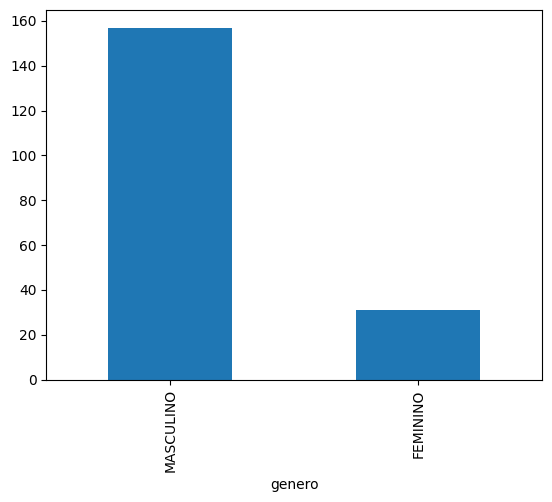

In [ ]:
df.groupby(['genero']).size().sort_values(ascending=False).plot.bar()

In [ ]:
df.groupby(['cor_raca']).size().sort_values(ascending=False)

cor_raca
BRANCA      140
PARDA        35
PRETA        10
INDÍGENA      2
AMARELA       1
dtype: int64

<Axes: xlabel='cor_raca'>

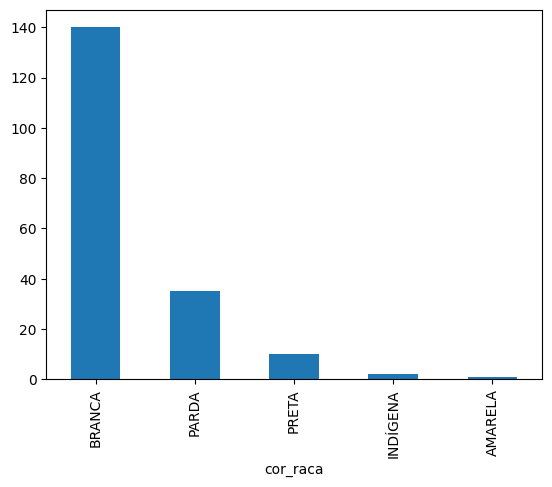

In [ ]:
df.groupby(['cor_raca']).size().sort_values(ascending=False).plot.bar()

In [ ]:
df.groupby(['regiao']).size().sort_values(ascending=False)

regiao
Sudeste         72
Nordeste        45
Sul             27
Norte           25
Centro-Oeste    19
dtype: int64

<Axes: xlabel='regiao'>

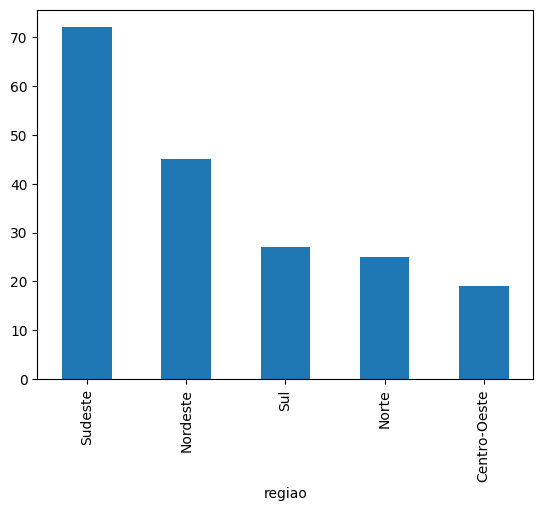

In [ ]:
df.groupby(['regiao']).size().sort_values(ascending=False).plot.bar()

<Axes: xlabel='cor_raca', ylabel='count'>

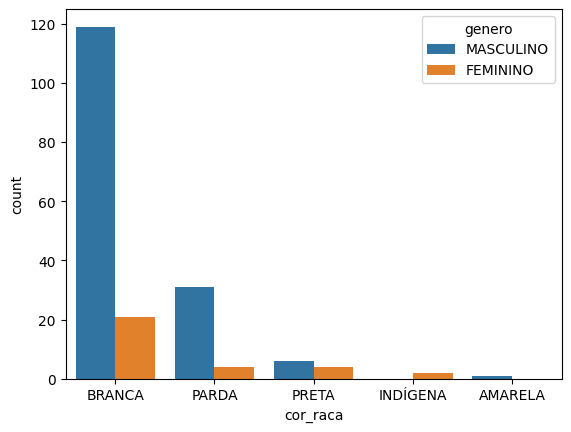

In [ ]:
sns.countplot(data=df, x="cor_raca", hue="genero")

<Axes: xlabel='regiao', ylabel='count'>

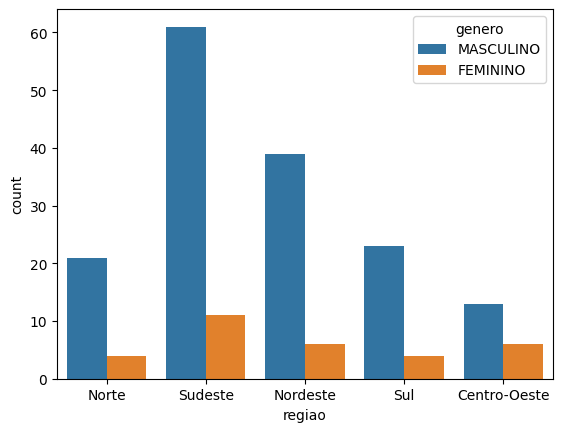

In [ ]:
sns.countplot(data=df, x="regiao", hue="genero")

<Axes: xlabel='regiao', ylabel='count'>

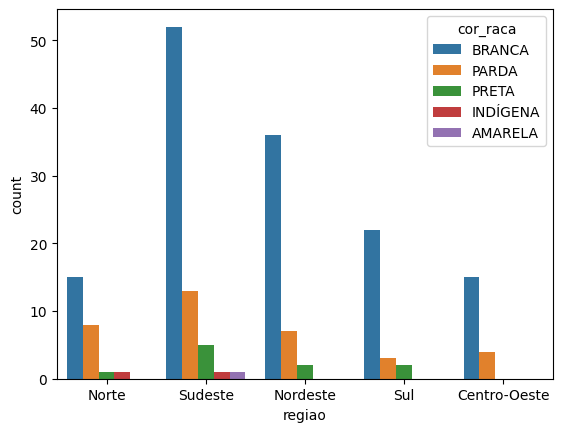

In [ ]:
sns.countplot(data=df, x="regiao", hue="cor_raca")